# Analysis 1 - Analysis of the voting rules.

To explore the rules in **more details**, we created a class *<tt>MovingVoterProfile</tt>*, which enables to see the evolution of the candidates' scores depending on the embeddings of one particular voter, which are changing.

In [1]:
import embedded_voting as ev

In [2]:
moving_profile = ev.MovingEmbeddings()

## Description of the profile

The basic version of the profile contains **4 candidates** and **4 voters** :

* **Voter 0** is the moving voter. His initial position is the same than the **Voter 1**, and he gives a score of $0.8$ to every candidate, except for **Candidate 4** which receive a score of $0.5$.
* **Voter 1, 2, and 3** respectively supports **Candidate 1, 2 and 3** with a score of $1$ and gives a score of $0.1$ to every other candidate, except **Candidate 4** which receive a score of $0.5$ from every voter.

The following figure shows the initial configuration of the profile.

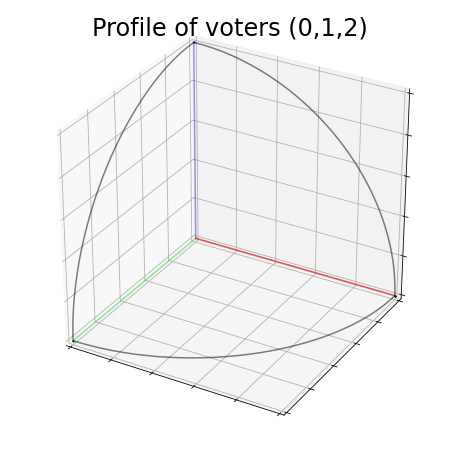

In [3]:
moving_profile.plot()

## The evolution of the scores

Then we want to track **the evolution** of the scores of the different candidates depending on the embeddings of the **Voter 0**. These embeddings are changing as detailed on the following figure:


![moving voter](img/moving.jpg)


As you can see, the voter starts in the **red** area and ends in the **green** area but always remains orthogonal to the **blue** voter.

Using this, we can see what happens to the different scores **depending on the voting rule** used.

Without any surprise, it **does not change anything** for rules which do not depend on the embeddings :

* When we do **the sum of the scores**, every candidate has the same final score.
* When we do **the product of the scores**, only the **Candidate 4** (consensus) has a good score.

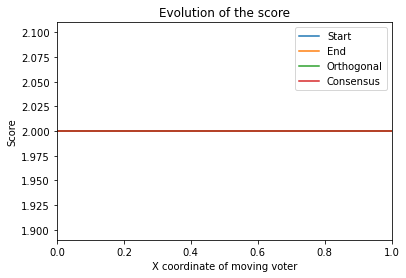

In [4]:
rule = ev.SumScores()
moving_profile(rule).plot_scores_evolution()

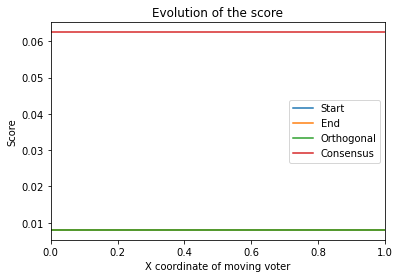

In [5]:
rule = ev.ProductScores()
moving_profile(rule).plot_scores_evolution()

It becomes interesting when we look at **geometrical rules**. What happens for the **Zonotope** and **MaxCube** rules?

* The **Consensus candidate** gets the best score. 
* The second best candidate is the one supported by the **Orthogonal vector**. Indeed, he is supported by the **moving voter** and a another one which is **orthogonal** to the first one, and *orthogonality maximizes the volume*.
* For the same reason, the candidate supported by the **voter of the start** gets a better score at the end, and the candidate supported by the **voter of the end** get the better score at the beginning.

However, you can notice that the score of some candidate is greater when the moving voter is between the two positions, and there is no intuitive interpretation of this observation.

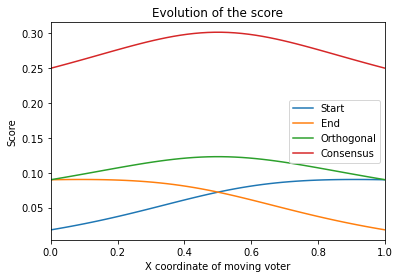

In [6]:
rule = ev.ZonotopeRule()
moving_profile(rule).plot_scores_evolution()

c:\users\theo delemazure\documents\ens\stage nokia\git\embedded_voting\embedded_voting\scoring\singlewinner\geometric.py:112: RuntimeWarning: invalid value encountered in sqrt
  volume = max(volume, np.sqrt(np.linalg.det(np.dot(current_embeddings, current_embeddings.T))))


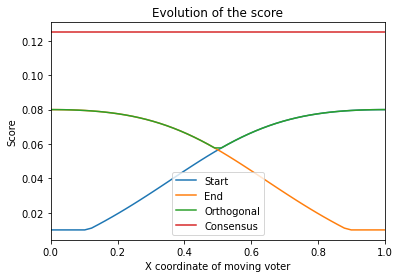

In [7]:
rule = ev.MaxCubeRule()
moving_profile(rule).plot_scores_evolution()

What happens with **SVD Rules**?

* **SVDNash**, **SVDLog** and **SVDSum** work a bit like the **Zonotope** and **MaxCube** rules, but the scores of the candidates are always between their scores at the **beginning** and at the **end**.
* **SVDMin** is not very interesting: nothing really change between the beginning and the end.
* **SVDMax** is the opposite of the other rules : the **Consensus candidate** and the **Orthogonal candidate** receive the worst scores, but the candidate supported by the voter from the **start** get the best score at the beginning and the candidate supported by the voter from the **end** get the best score at the end.

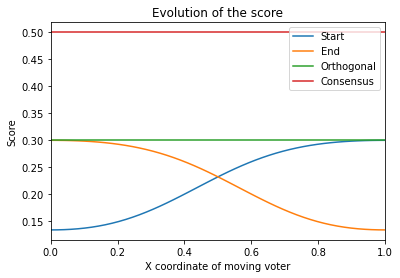

In [8]:
rule = ev.SVDNash()
moving_profile(rule).plot_scores_evolution()

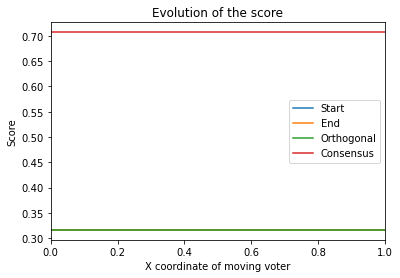

In [9]:
rule = ev.SVDMin()
moving_profile(rule).plot_scores_evolution()

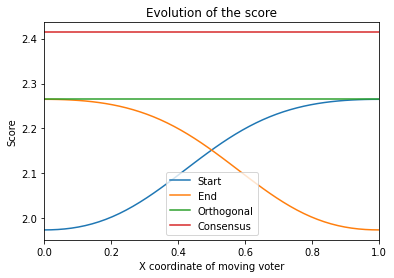

In [10]:
rule = ev.SVDSum()
moving_profile(rule).plot_scores_evolution()

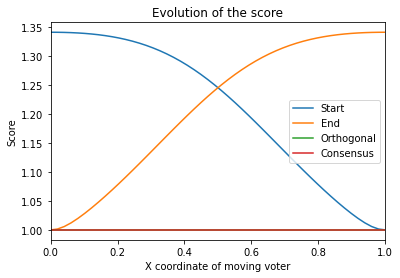

In [11]:
rule = ev.SVDMax()
moving_profile(rule).plot_scores_evolution()

Finally, we obtain a beautiful figure with the **Features rule**, even if it is a bit strange.

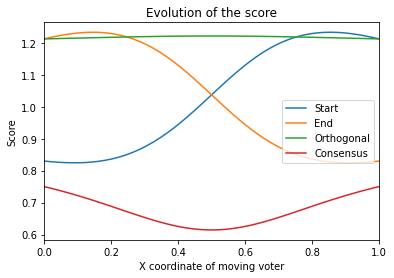

In [12]:
rule = ev.FeaturesRule()
moving_profile(rule).plot_scores_evolution()

## The evolutions of the features

Some rules associate **features vectors** to every candidate. That is the case of the **SVDMax** and the **Features** rules. We can show the evolution of these vectors using the same class.

You can see that there are **major differences** between the features of the two rules. For instance, the features of the **Consensus candidate** follow the moving voter for the **SVDMax** rule, and they are on the center of the simplex for the **Features** rule.

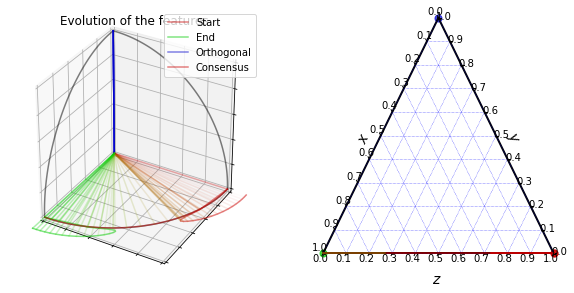

In [13]:
rule = ev.SVDMax()
moving_profile(rule).plot_features_evolution()

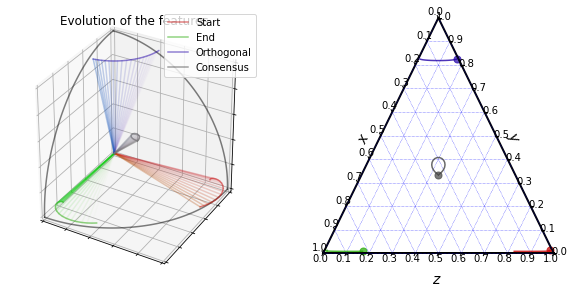

In [14]:
rule = ev.FeaturesRule()
moving_profile(rule).plot_features_evolution()

## More complex profiles

Of course, you can play with **more complex profiles**, and even change the index of the moving voter.

In [15]:
scores = [[1, .1, .1, .3], [.1, 1, .1, .3], [.1, .1, 1, .3]]
embs = ev.ParametrizedEmbeddings(50, 3)(polarisation=.8)
profile = ev.CorrelatedRatings(4, 3, scores)(embs, coherence=.8)

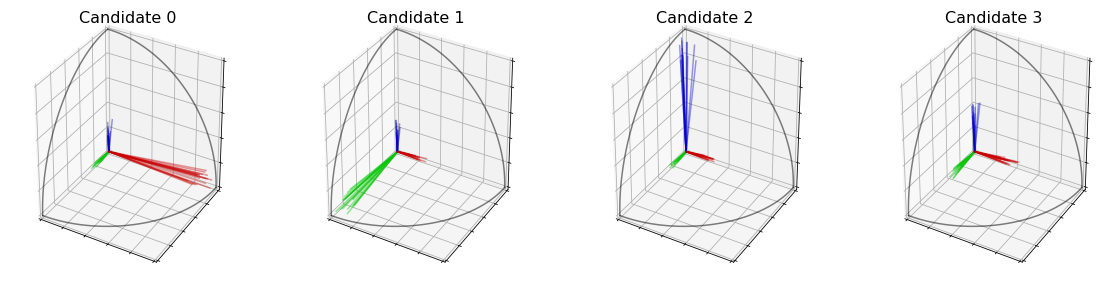

In [16]:
embs.plot_candidates(profile)

In [17]:
moving_profile = ev.MovingEmbeddings(embs)

We now obtain very funny plots for the **SVD Rules**:

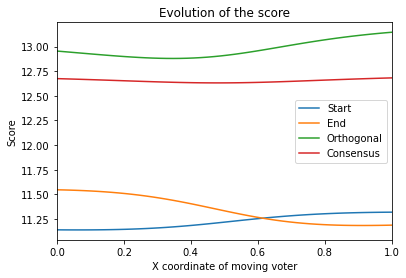

In [19]:
rule = ev.SVDNash()
moving_profile(rule, profile).plot_scores_evolution()

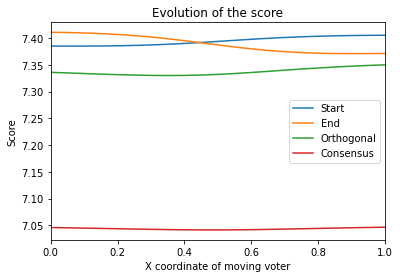

In [21]:
rule = ev.SVDSum()
moving_profile(rule, profile).plot_scores_evolution()

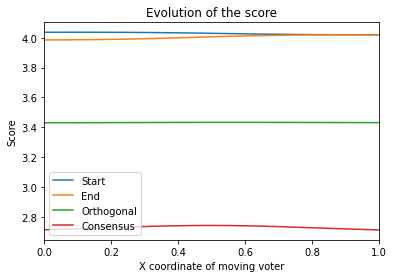

In [22]:
rule = ev.SVDMax()
moving_profile(rule, profile).plot_scores_evolution()

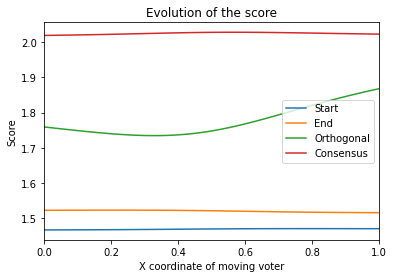

In [23]:
rule = ev.SVDMin()
moving_profile(rule, profile).plot_scores_evolution()

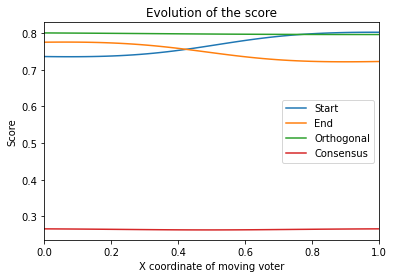

In [24]:
rule = ev.FeaturesRule()
moving_profile(rule, profile).plot_scores_evolution()

The features between **SVDMax** and **Features** rules are now far more similar:

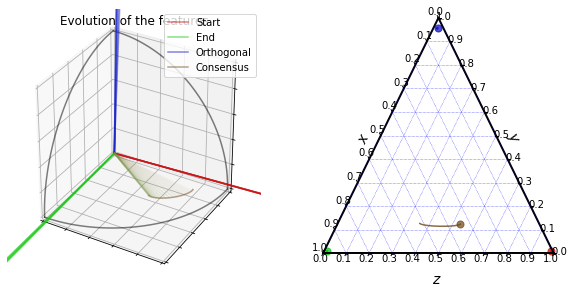

In [25]:
rule = ev.SVDMax()
moving_profile(rule, profile).plot_features_evolution()

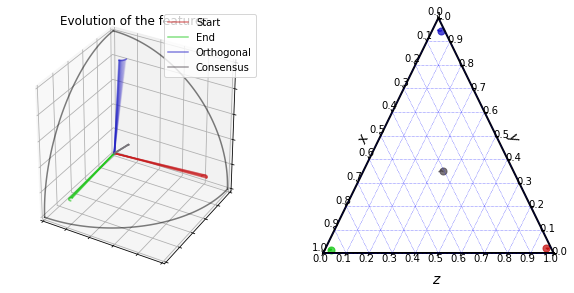

In [26]:
rule = ev.FeaturesRule()
moving_profile(rule, profile).plot_features_evolution()